In [1]:
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np
from jax import grad


import scipy 

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,12]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})


from tqdm import tqdm
import time

from jax.config import config
config.update("jax_enable_x64", True)

import pickle

%load_ext autoreload
%autoreload 2

In [2]:
    
with open("results.pkl", "rb") as f:
    opt_set_data = pickle.load(f)


In [5]:
def post_process(data):
    time = []
    analytic_loss = []
    mc_loss = []
    min_mc_loss = []
    max_mc_loss = []
    for i in range(len(data)):
        time.append(data[i][0][0])
        analytic_loss.append(data[i][0][1]/data[i][0][-1]**2)
        mc_loss.append(jnp.median(data[i][1])/data[i][0][-1]**2)
        min_mc_loss.append(jnp.percentile(data[i][1], 0.25)/data[i][0][-1]**2)
        max_mc_loss.append(jnp.percentile(data[i][1], 0.75)/data[i][0][-1]**2)
        
    return time, analytic_loss, mc_loss, min_mc_loss, max_mc_loss

def post_process_all_mc_data(data):
    mc_data = []
    for i in range(len(data)):
        mc_data.append(data[i][-1][0][2])
    return mc_data

adapt_function_dims = [5, 4, 100, 3, 100, 3, 5, 6, 2, 3, 2, 100, 4, 2, 
                        100, 2, 3, 3, 90, 100, 36, 110, 110, 30, 100, 2, 100, 100, 
                        100, 100, 3, 2, 3, 100, 100, 100, 5, 11, 100, 3, 3, 3,
                        3, 100, 2, 100, 2, 100, 100, 100, 100, 31, 100, 2]

AIRCRFTB
0
Dim 5


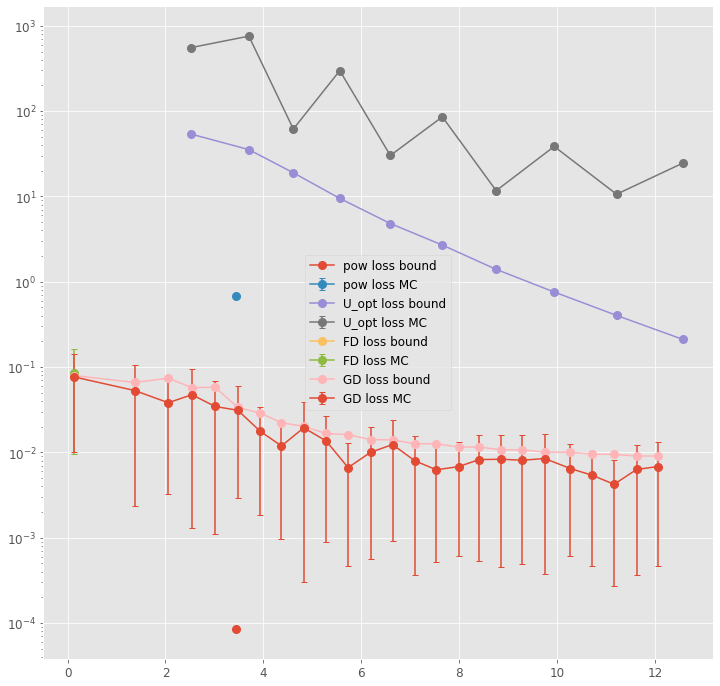

ALLINITU
1
Dim 4


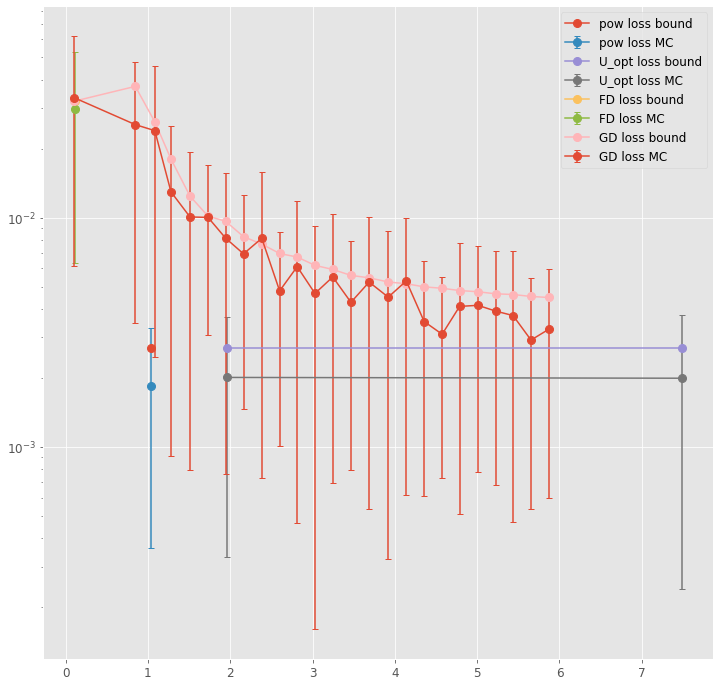

ARWHEAD
2
Dim 100


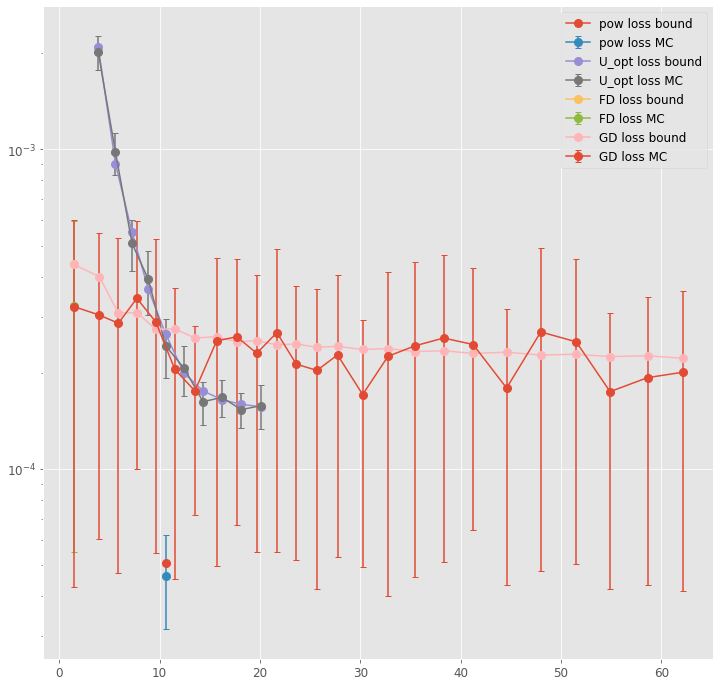

BARD
3
Dim 3


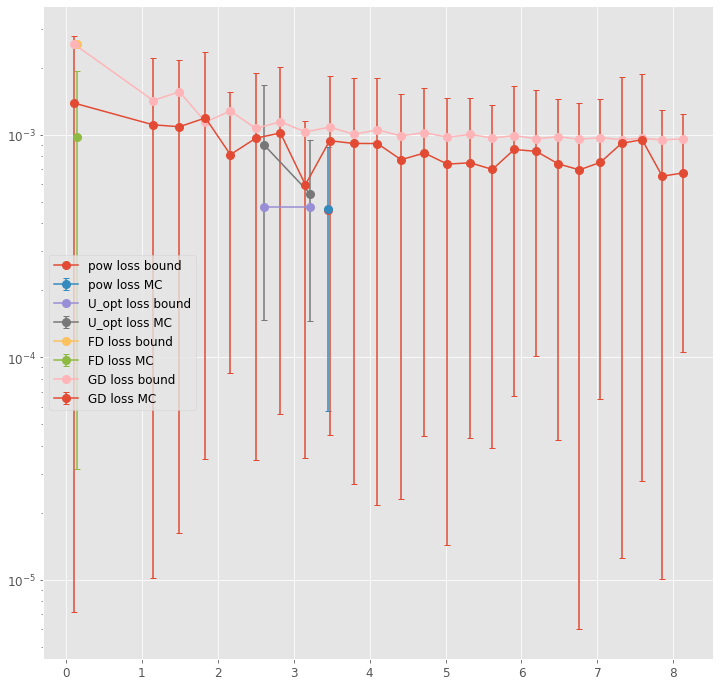

BDQRTIC
4
Dim 100


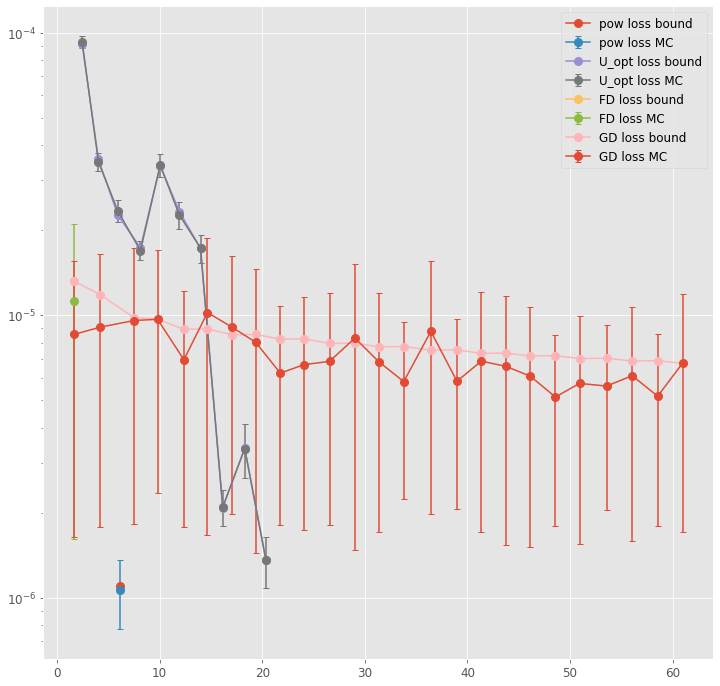

BIGGS3
5
Dim 3


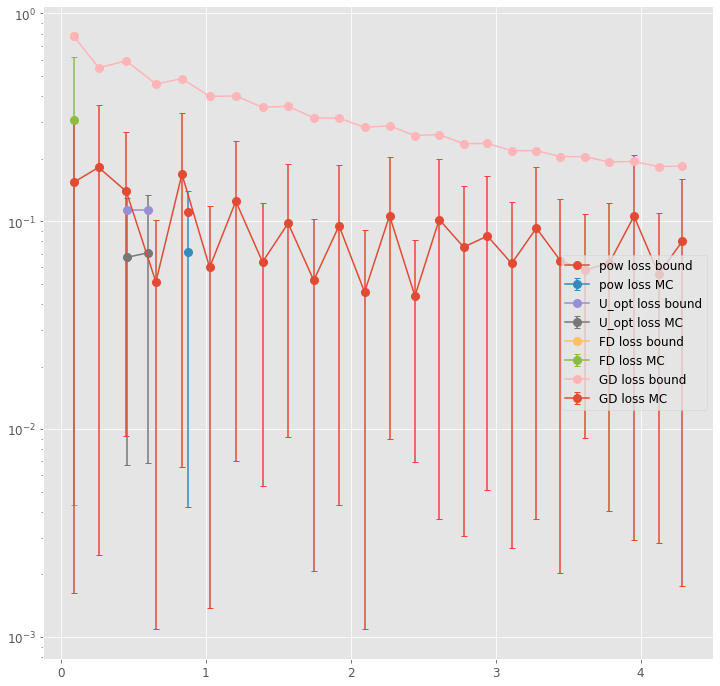

BIGGS5
6
Dim 5


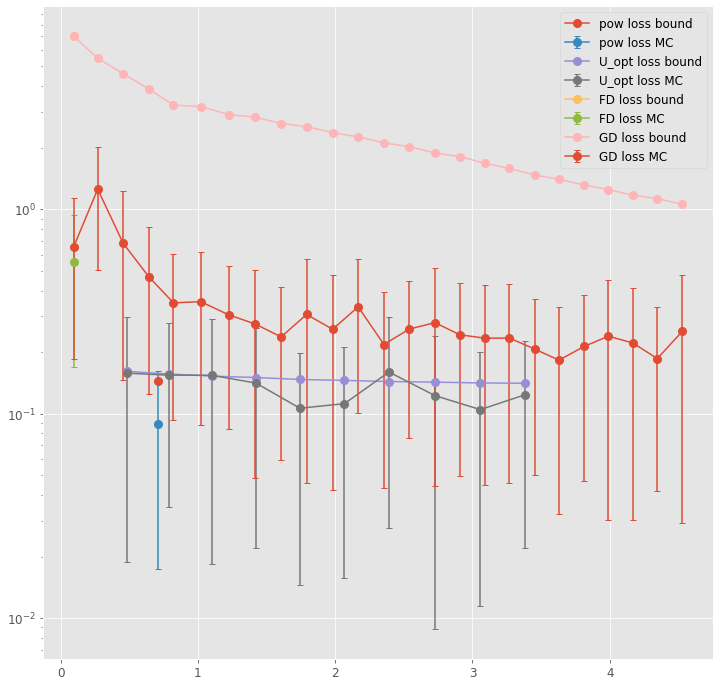

BIGGS6
7
Dim 6


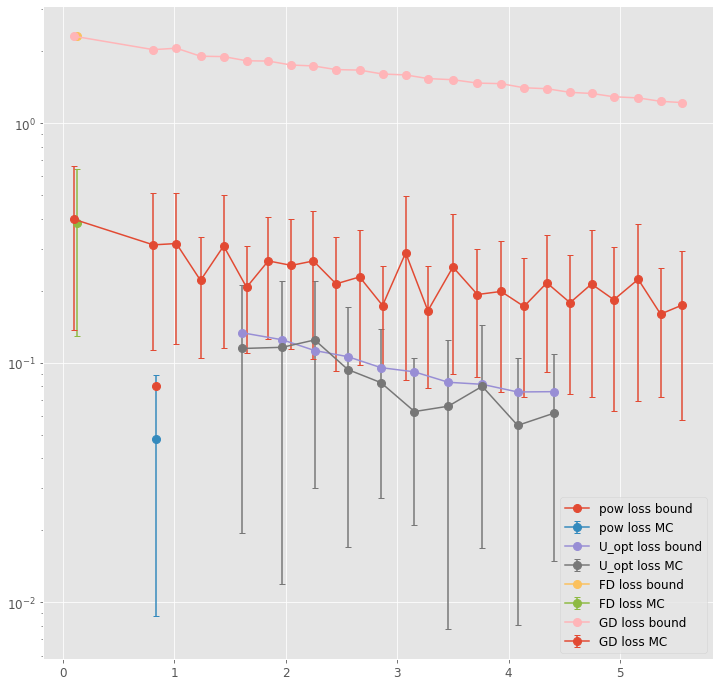

BOX2
8
Dim 2


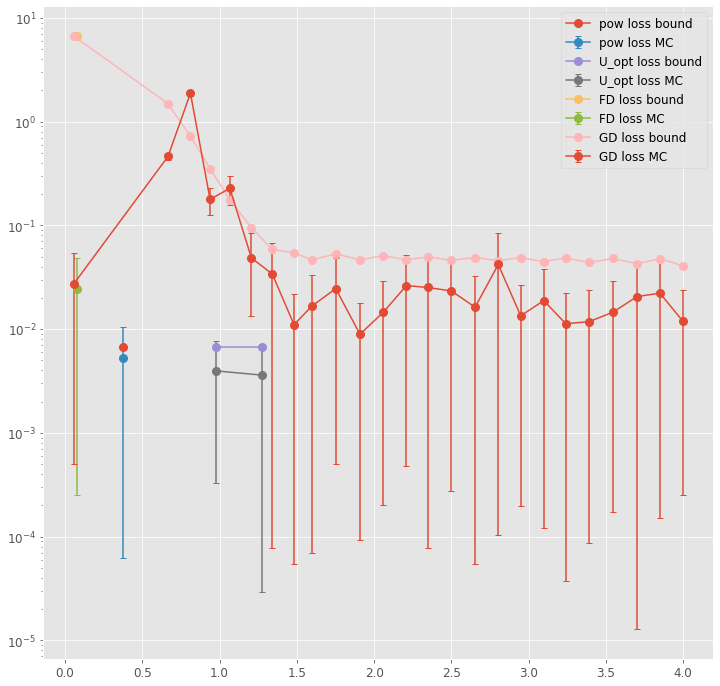

BOX3
9
Dim 3


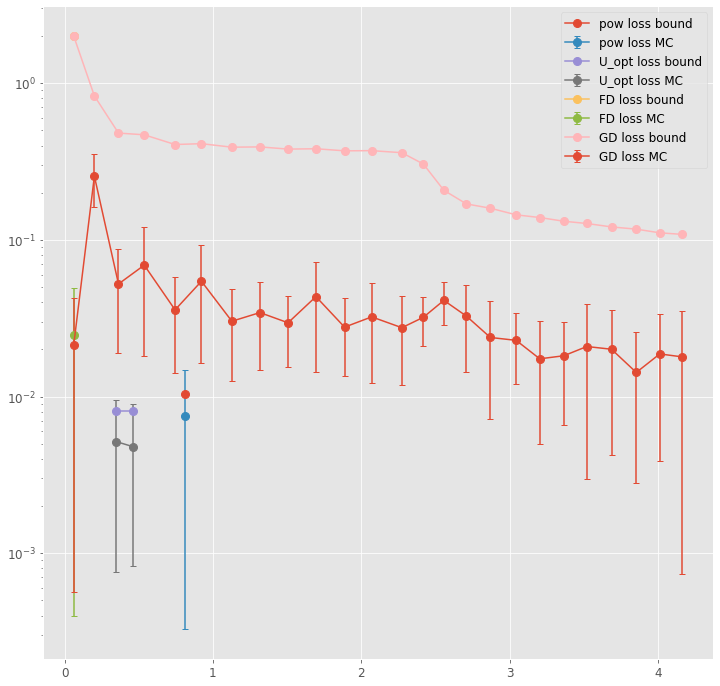

BRKMCC
10
Dim 2


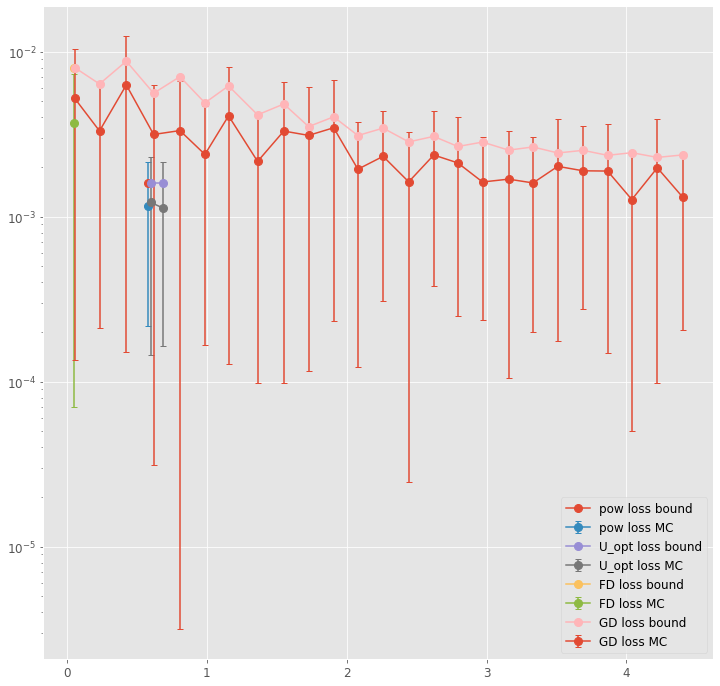

BROWNAL
11
Dim 100


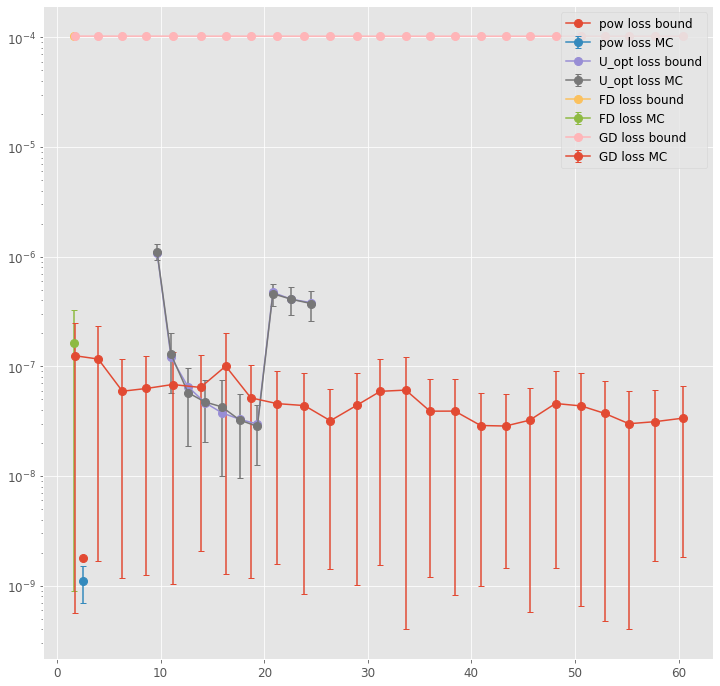

BROWNDEN
12
Dim 4


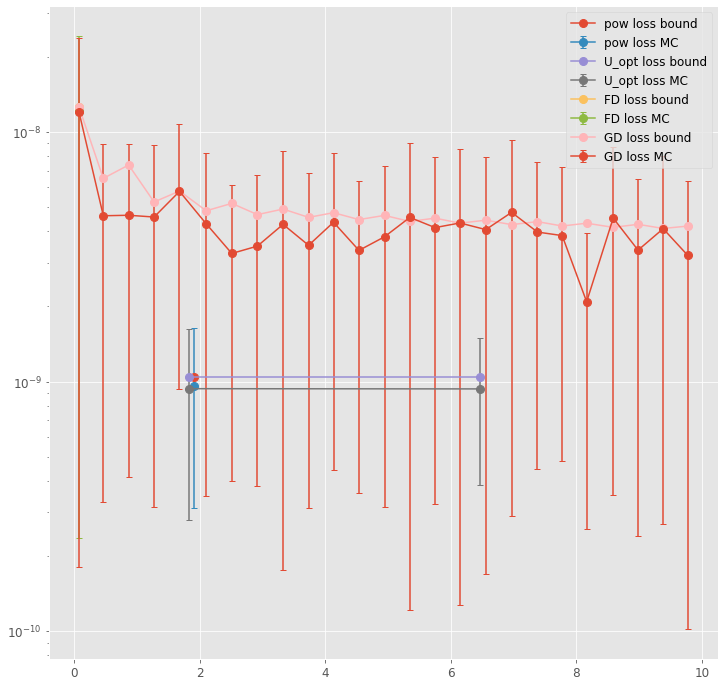

CLIFF
13
Dim 2


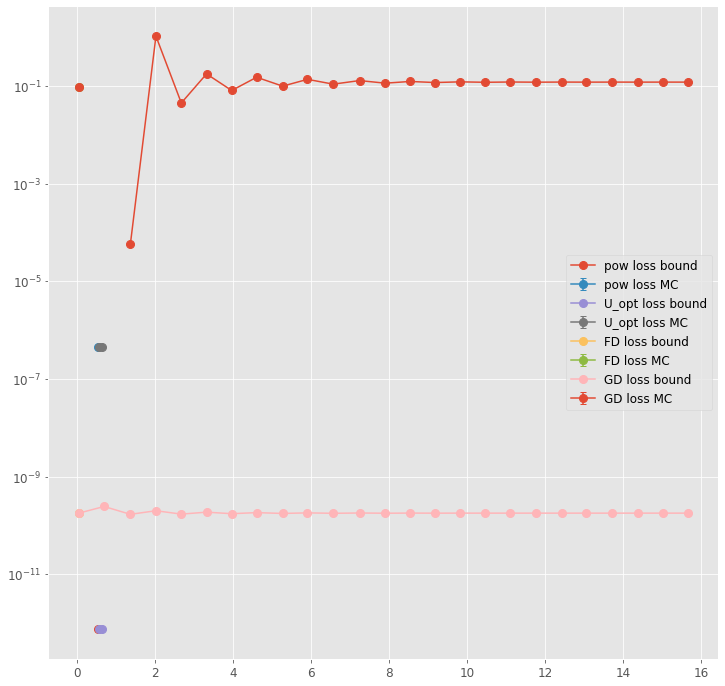

DQRTIC
14
Dim 100


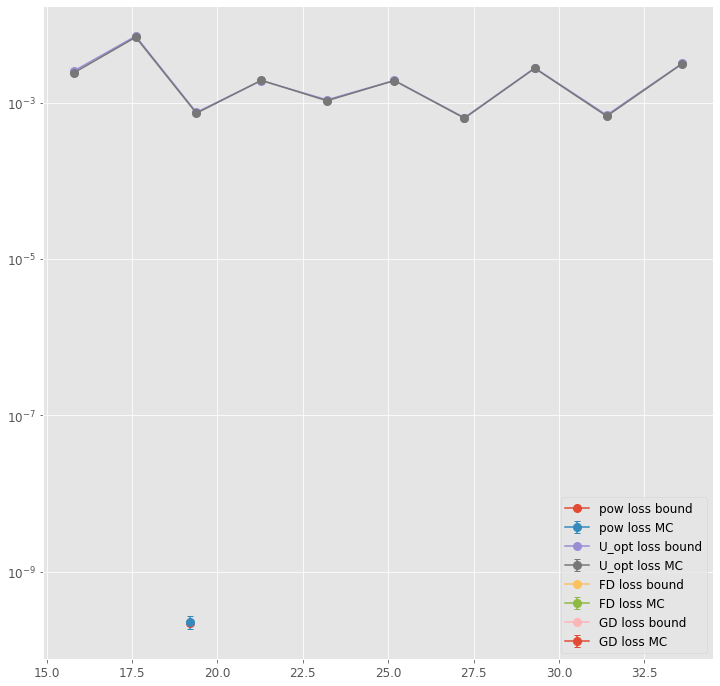

EDENSCH
15
Dim 2


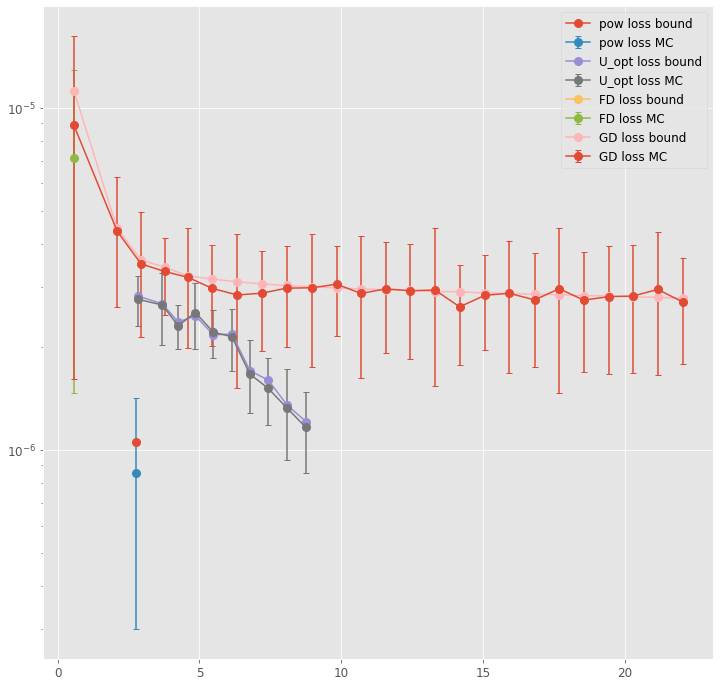

ENGVAL1
16
Dim 3


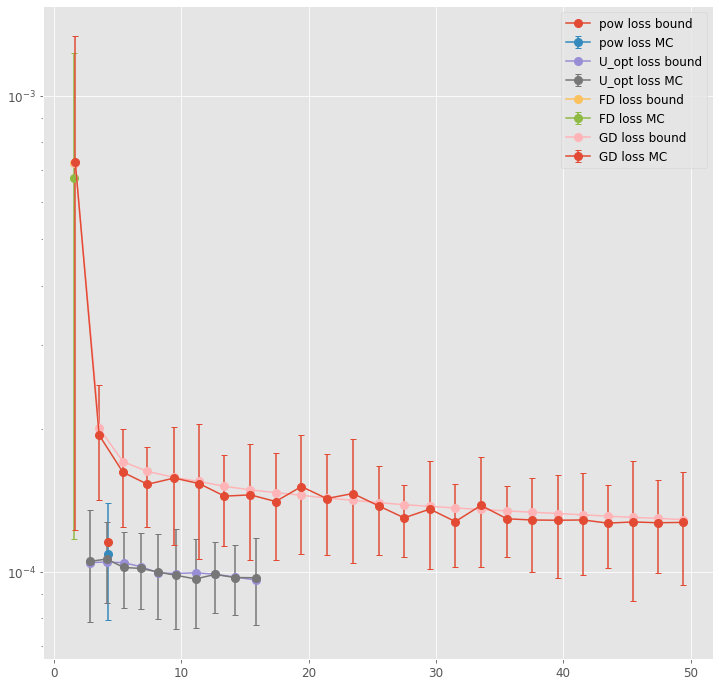

EXPFIT
17
Dim 3


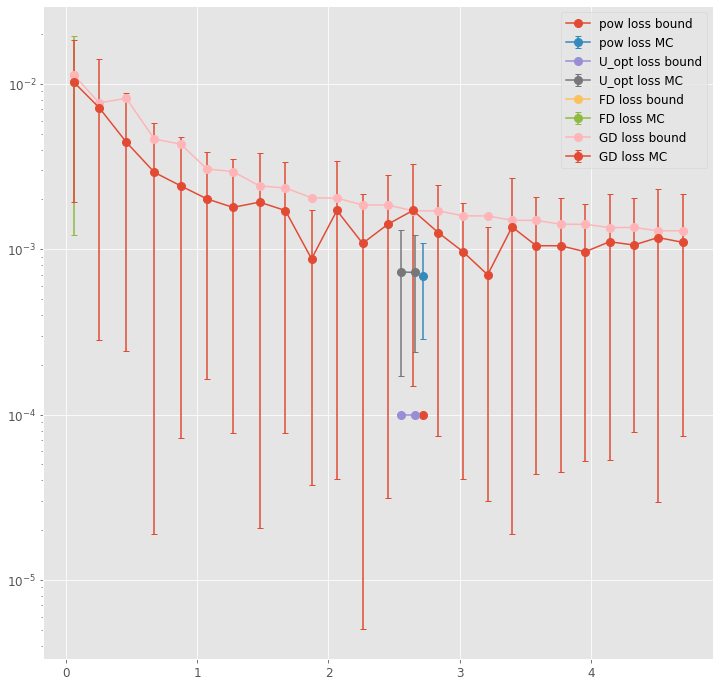

FLETCBV3
18
Dim 90


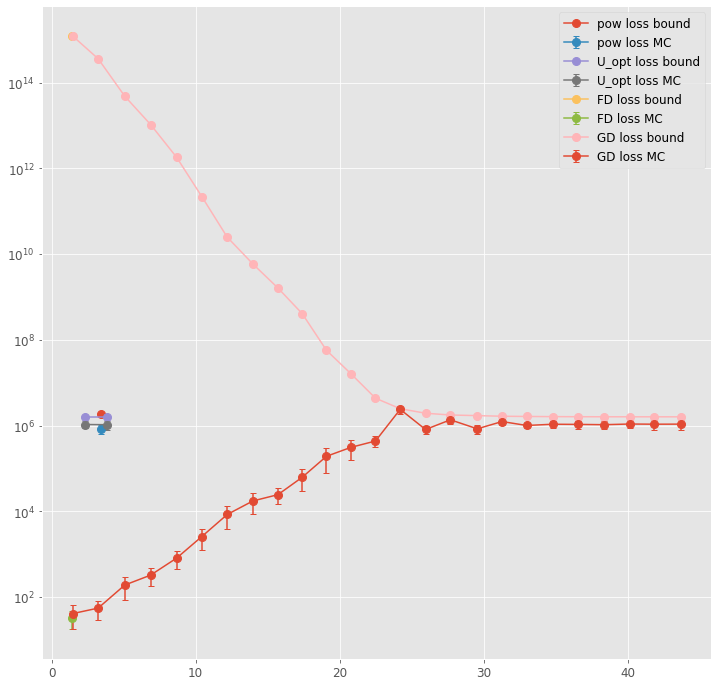

FLETCHBV
19
Dim 100


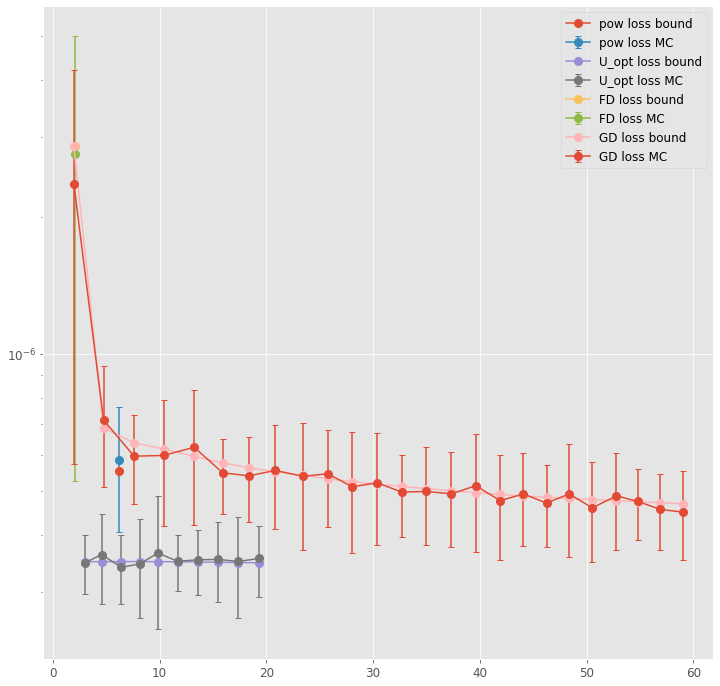

FREUROTH
20
Dim 36


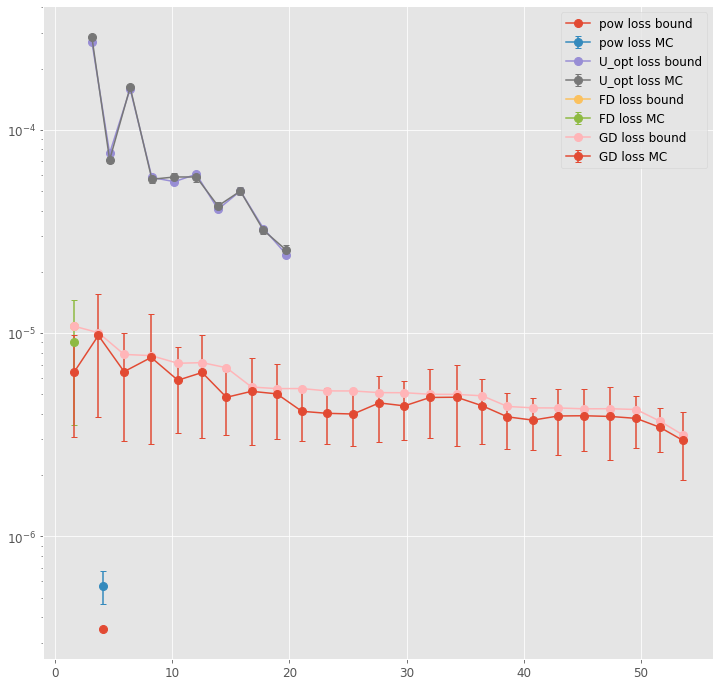

GENROSE
21
Dim 110


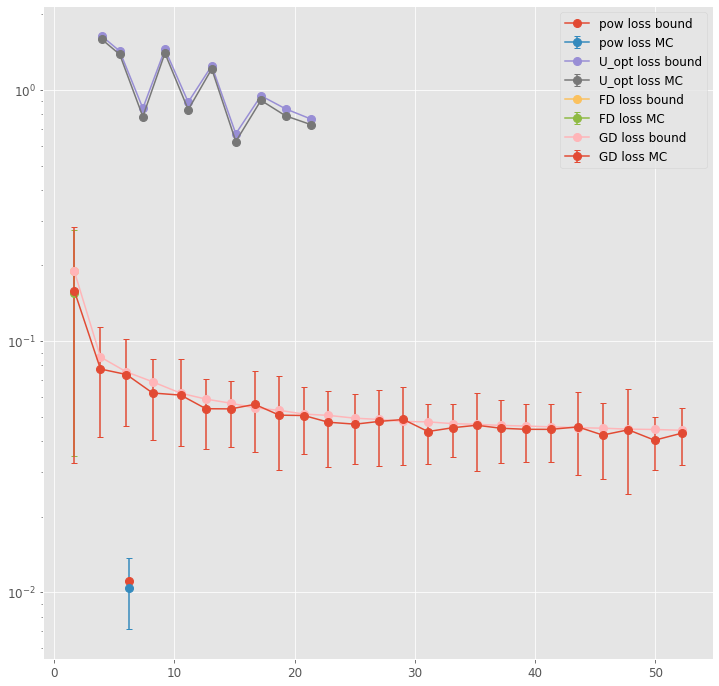

GULF
22
Dim 110


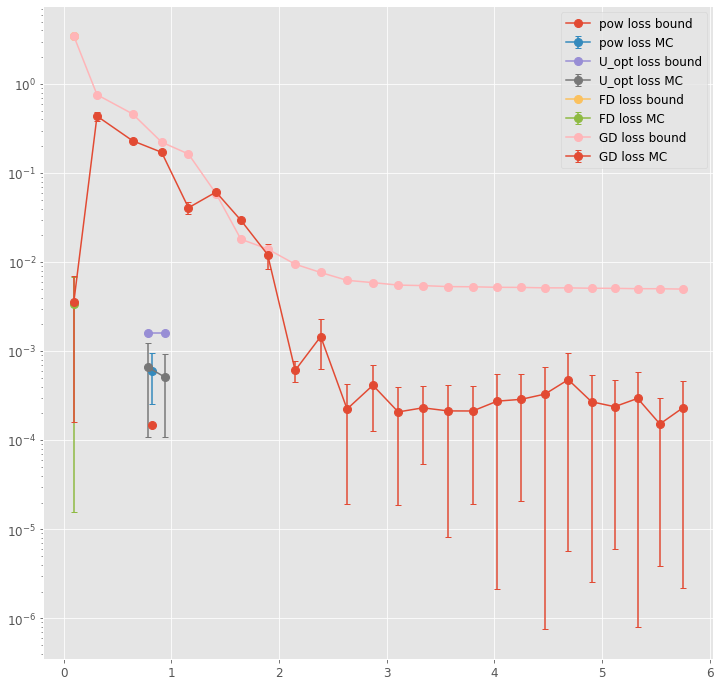

HAIRY
23
Dim 30


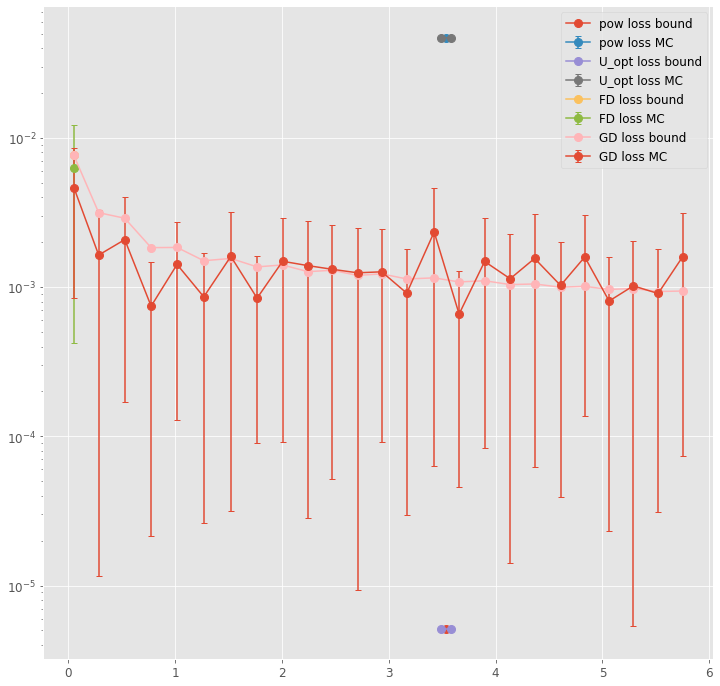

HELIX
24
Dim 100


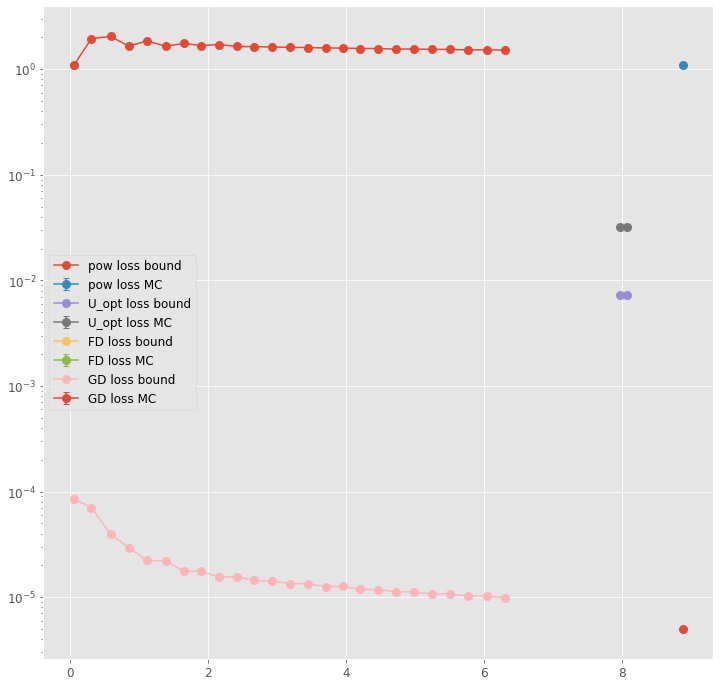

NCB20B
25
Dim 2


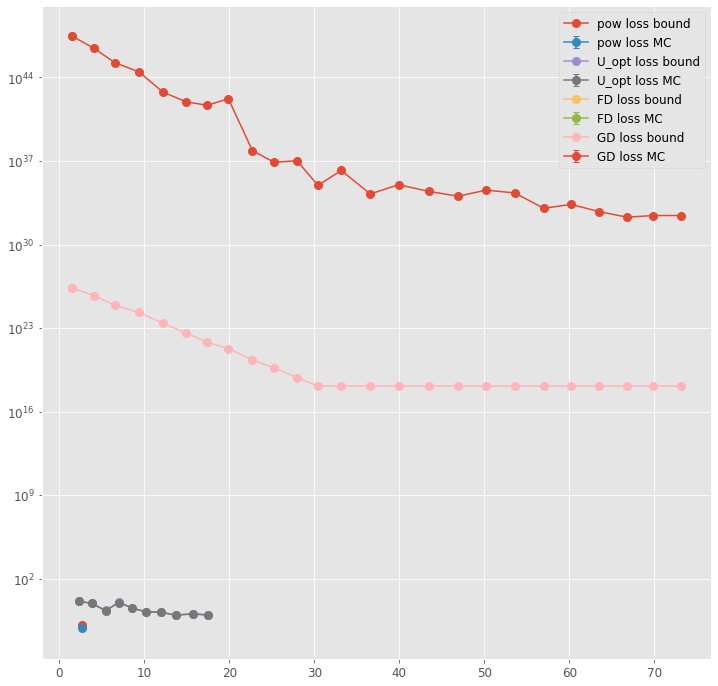

NONDIA
26
Dim 100


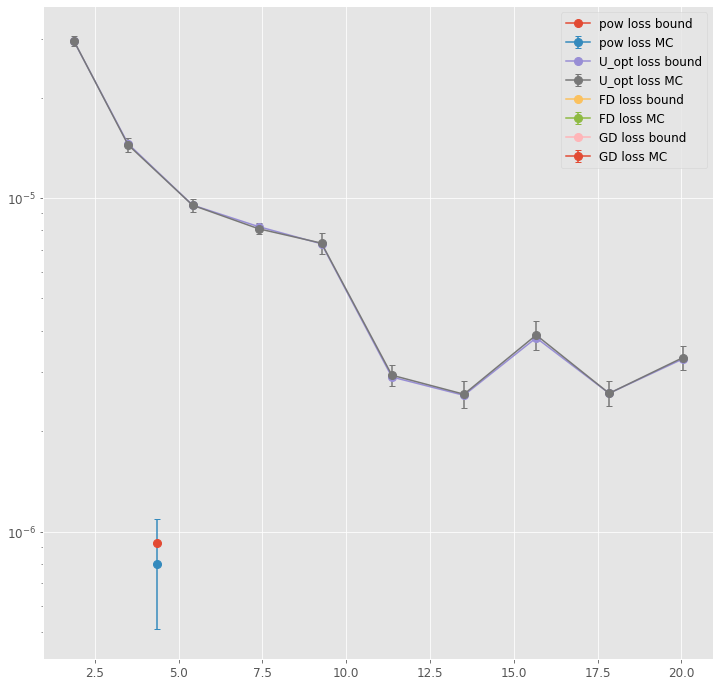

NONDQUAR
27
Dim 100


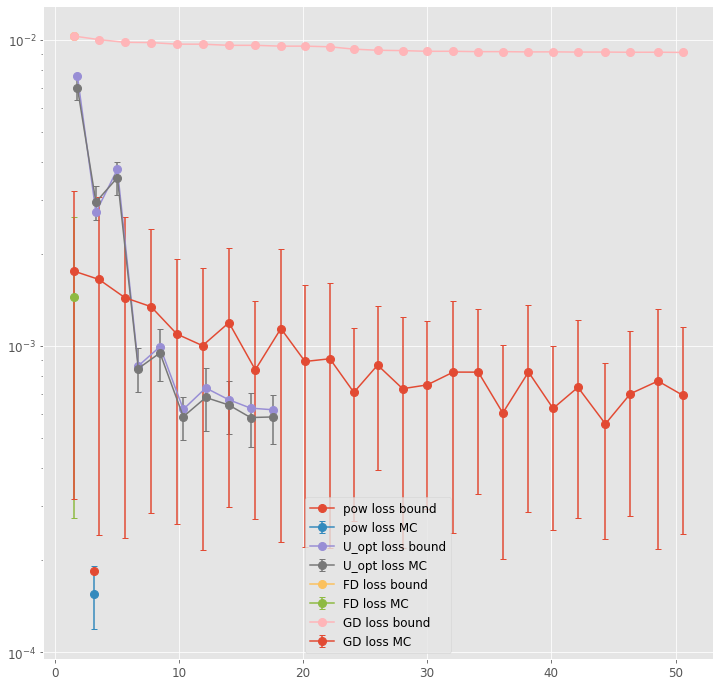

OSBORNEA
28
Dim 100


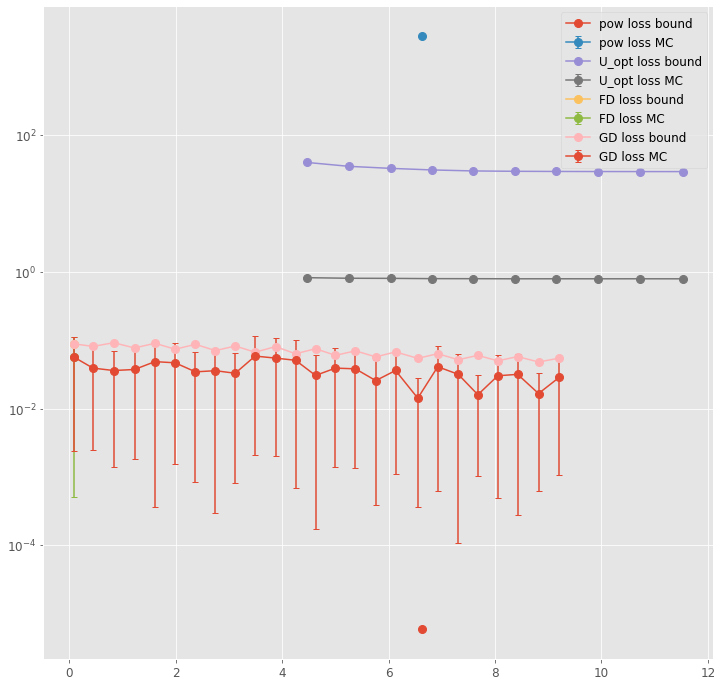

OSBORNEB
29
Dim 100


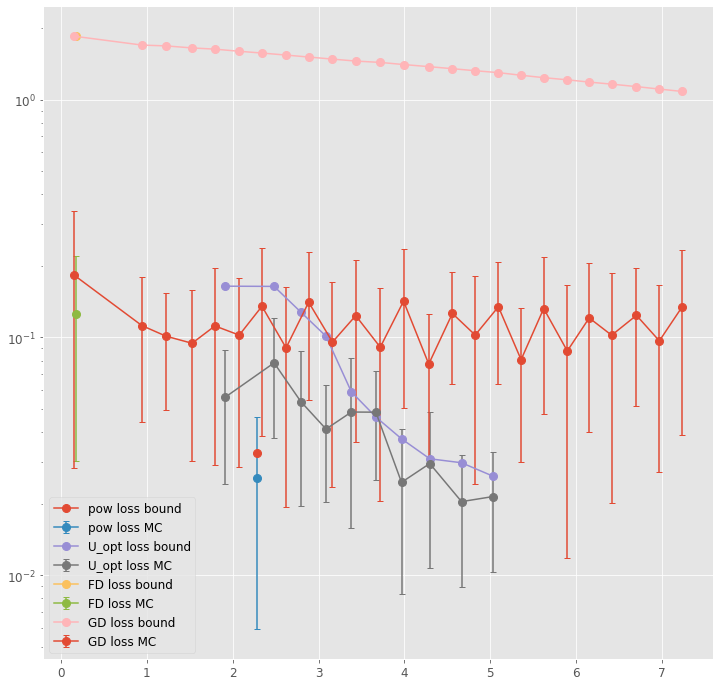

PENALTY1
30
Dim 3


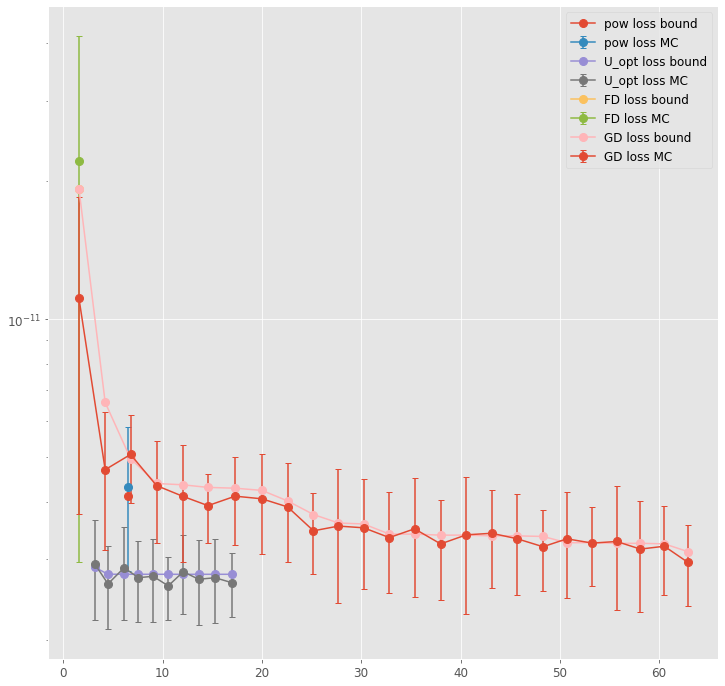

PFIT1LS
31
Dim 2


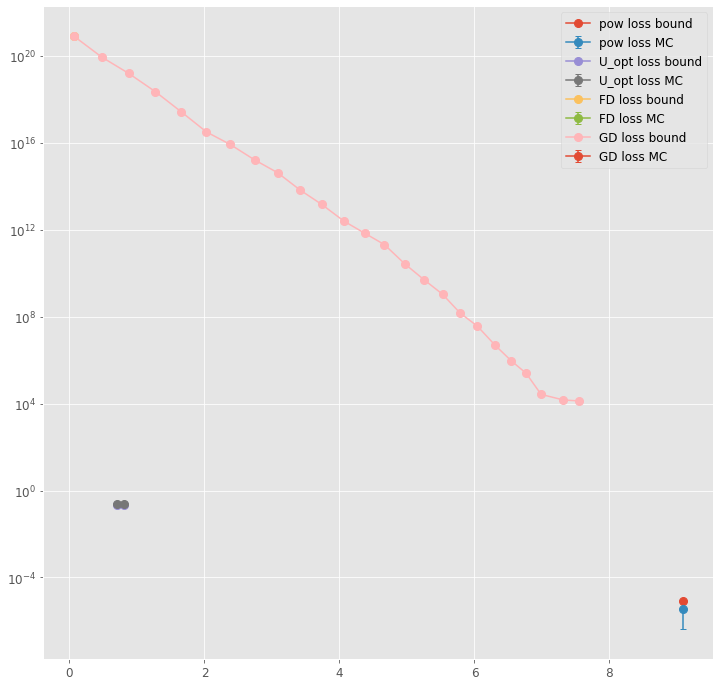

PFIT2LS
32
Dim 3


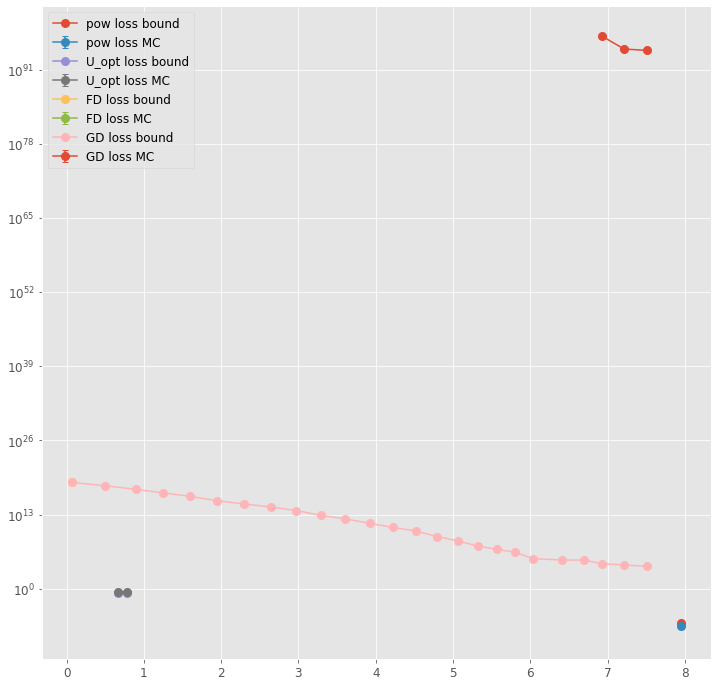

PFIT3LS
33
Dim 100


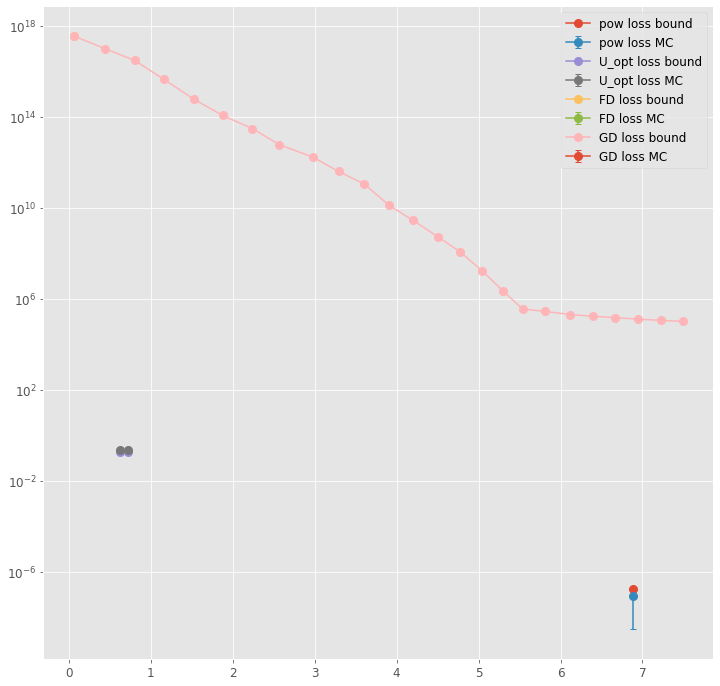

PFIT4LS
34
Dim 100


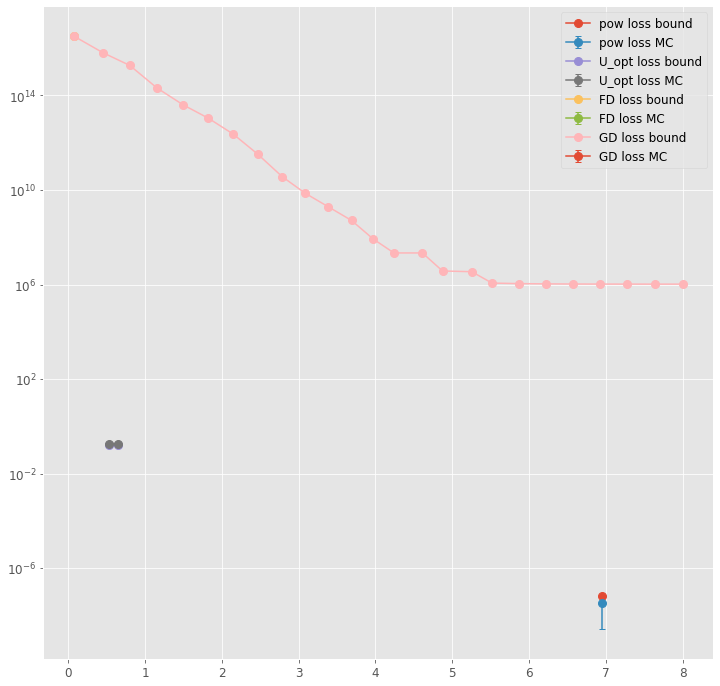

QUARTC
35
Dim 100


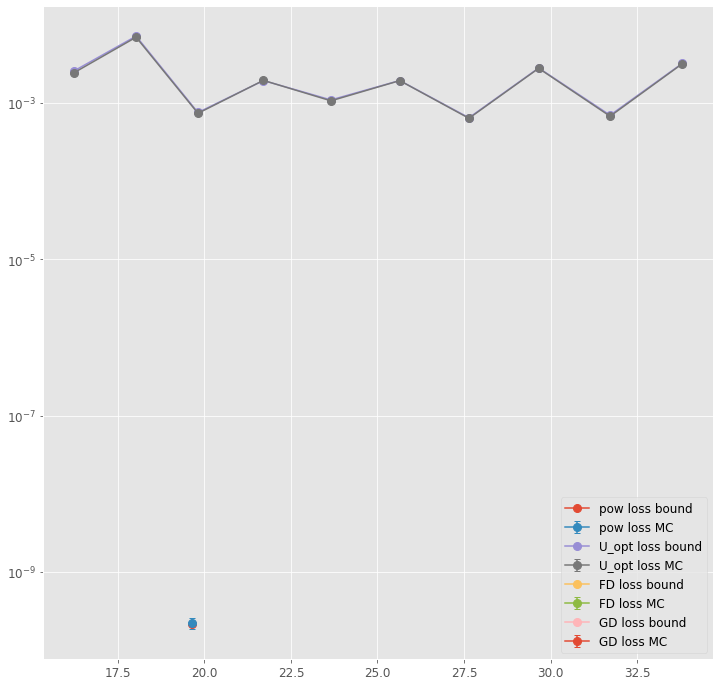

SINEVAL
36
Dim 5


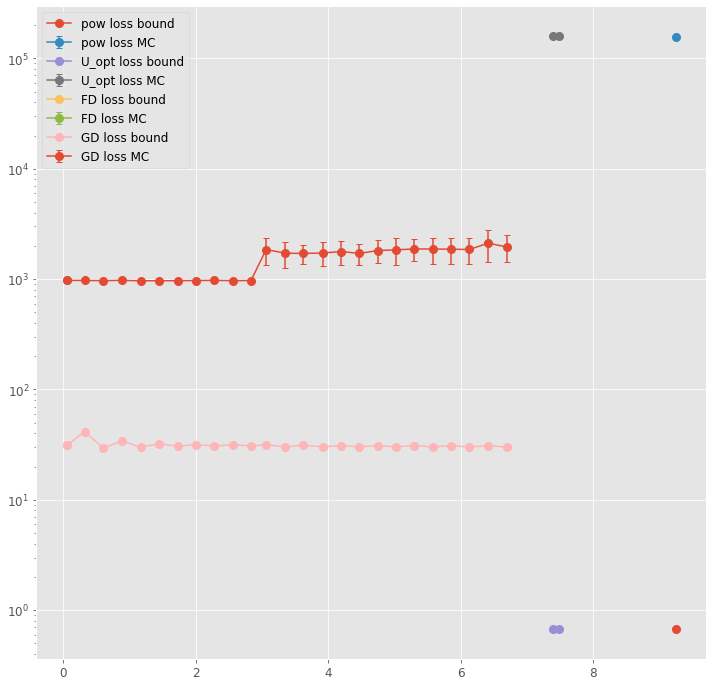

SINQUAD
37
Dim 11


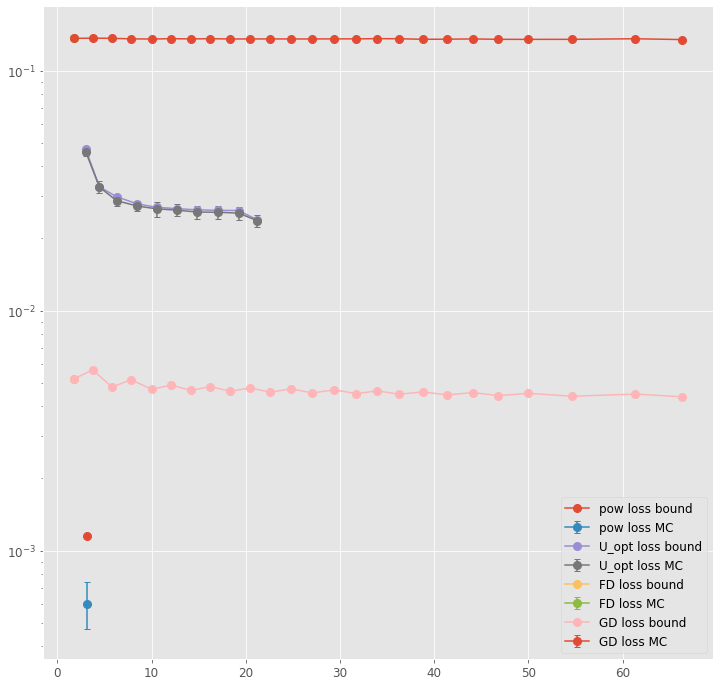

SISSER
38
Dim 100


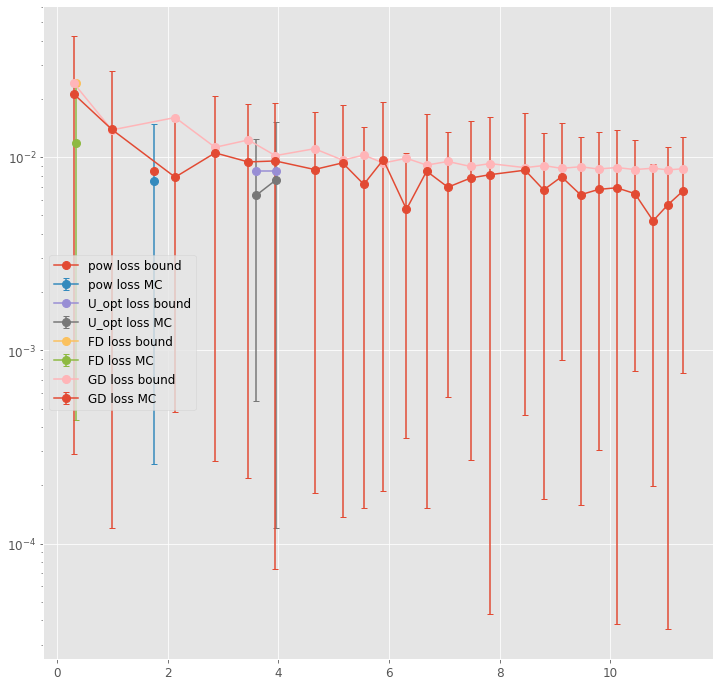

SPARSQUR
39
Dim 3


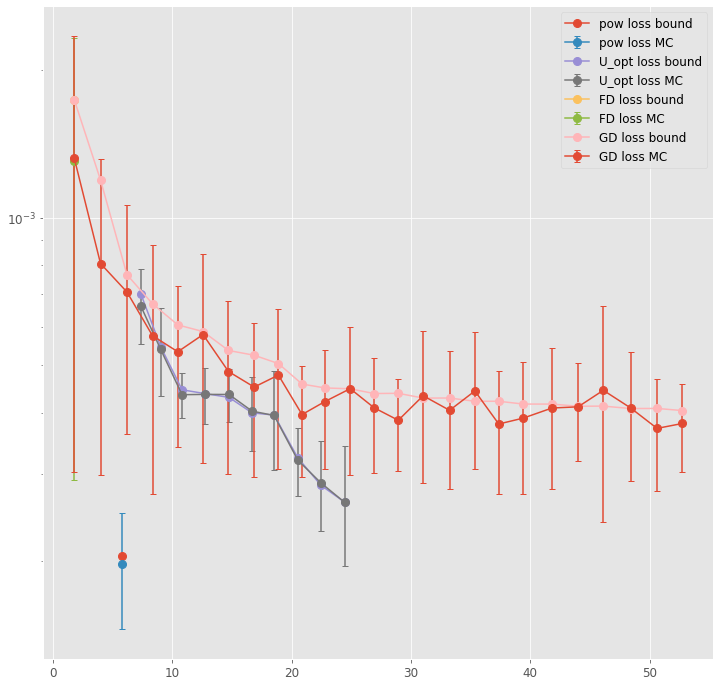

TOINTGSS
40
Dim 3


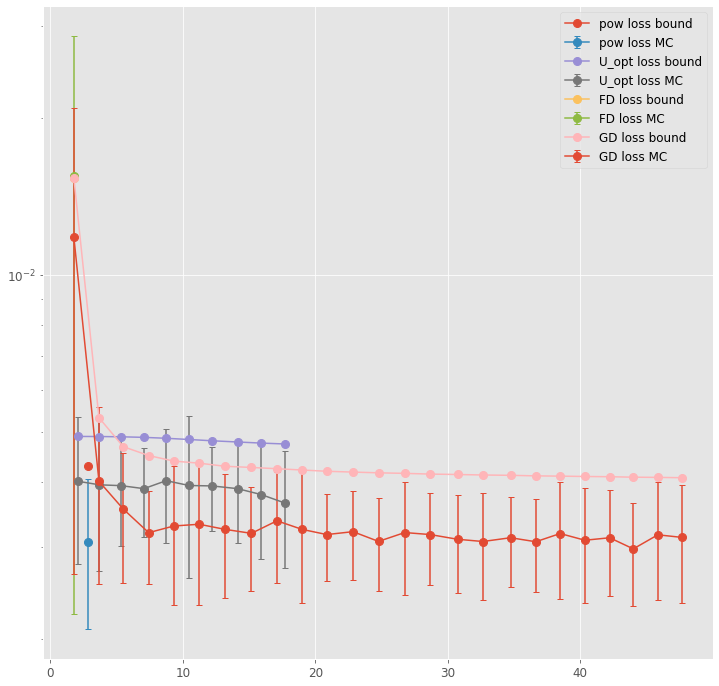

TQUARTIC
41
Dim 3


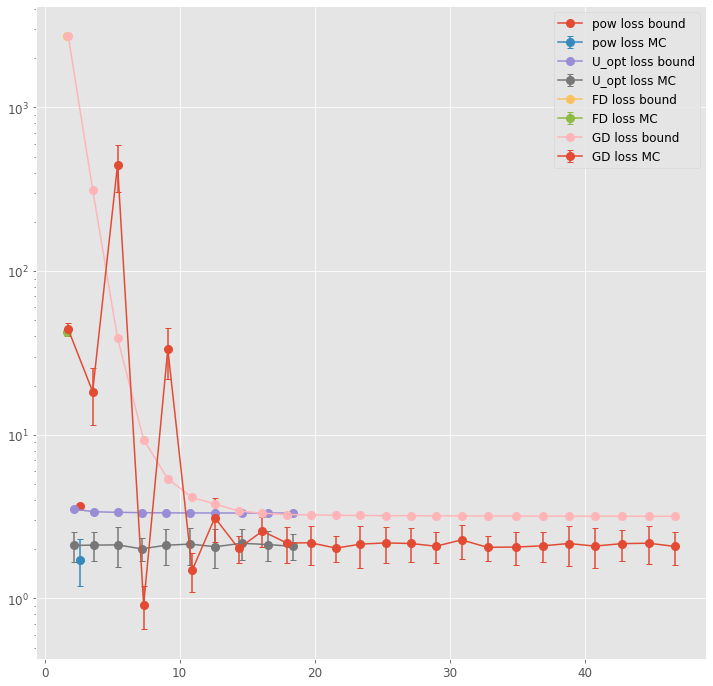

TRIDIA
42
Dim 3


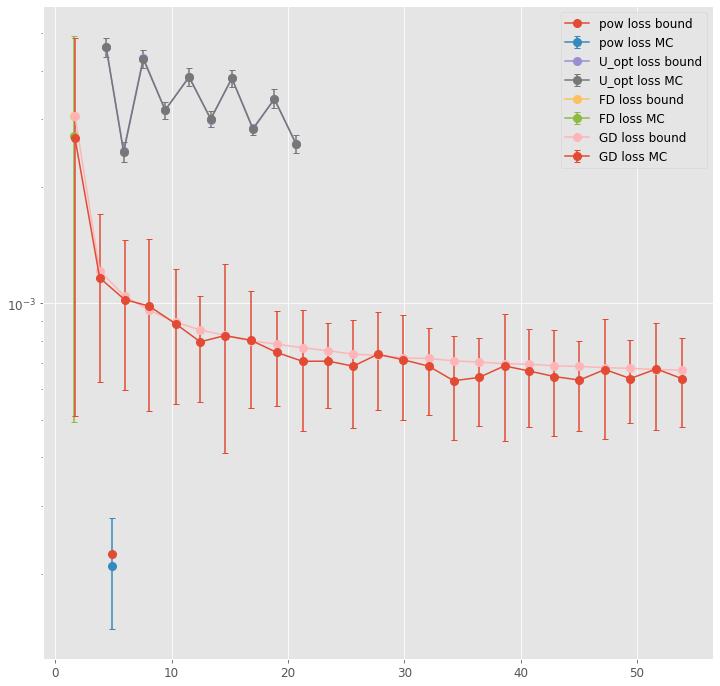

WATSON
43
Dim 100


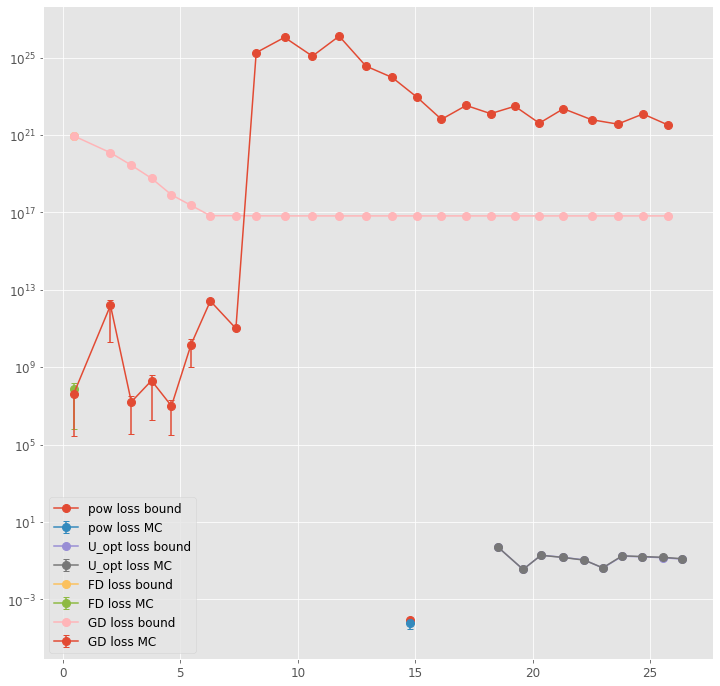

In [7]:
for i in range(len(opt_set_data["F_names"])):
    print(opt_set_data["F_names"][i])
    print(i)
    print("Dim", adapt_function_dims[i])
    
    time_taken, analytic_loss, mc_loss, min_mc_loss, max_mc_loss = post_process(opt_set_data["pow_res"][i])
    y_errs = jnp.array([min_mc_loss, max_mc_loss]) - jnp.array(mc_loss)
    plt.errorbar(x=time_taken, y=analytic_loss, yerr=None, marker="o", label="pow loss bound")
    plt.errorbar(x=time_taken, y=mc_loss,  yerr=y_errs, capsize=3, marker="o", label="pow loss MC")

    time_taken, analytic_loss, mc_loss, min_mc_loss, max_mc_loss = post_process(opt_set_data["U_opt_res"][i])
    y_errs = jnp.array([min_mc_loss, max_mc_loss]) - jnp.array(mc_loss)
    plt.errorbar(x=time_taken, y=analytic_loss, yerr=None, marker="o", label="U_opt loss bound")
    plt.errorbar(x=time_taken, y=mc_loss, yerr=y_errs, capsize=3, marker="o", label="U_opt loss MC")

    time_taken, analytic_loss, mc_loss, min_mc_loss, max_mc_loss = post_process(opt_set_data["FD_res"][i])
    y_errs = jnp.array([min_mc_loss, max_mc_loss]) - jnp.array(mc_loss)
    plt.errorbar(x=time_taken, y=analytic_loss, yerr=None, marker="o", label="FD loss bound")
    plt.errorbar(x=time_taken, y=mc_loss, yerr=y_errs, capsize=3, marker="o", label="FD loss MC")

    time_taken, analytic_loss, mc_loss, min_mc_loss, max_mc_loss = post_process(opt_set_data["GD_res"][i])
    y_errs = jnp.array([min_mc_loss, max_mc_loss]) - jnp.array(mc_loss)
    plt.errorbar(x=time_taken, y=analytic_loss, yerr=None, marker="o", label="GD loss bound")
    plt.errorbar(x=time_taken, y=mc_loss, yerr=y_errs, capsize=3, marker="o", label="GD loss MC")

    plt.yscale("log")
    plt.legend()
    plt.show()

In [57]:
FD_mc_loss = post_process_all_mc_data(opt_set_data["FD_res"])
pow_mc_loss = post_process_all_mc_data(opt_set_data["pow_res"])

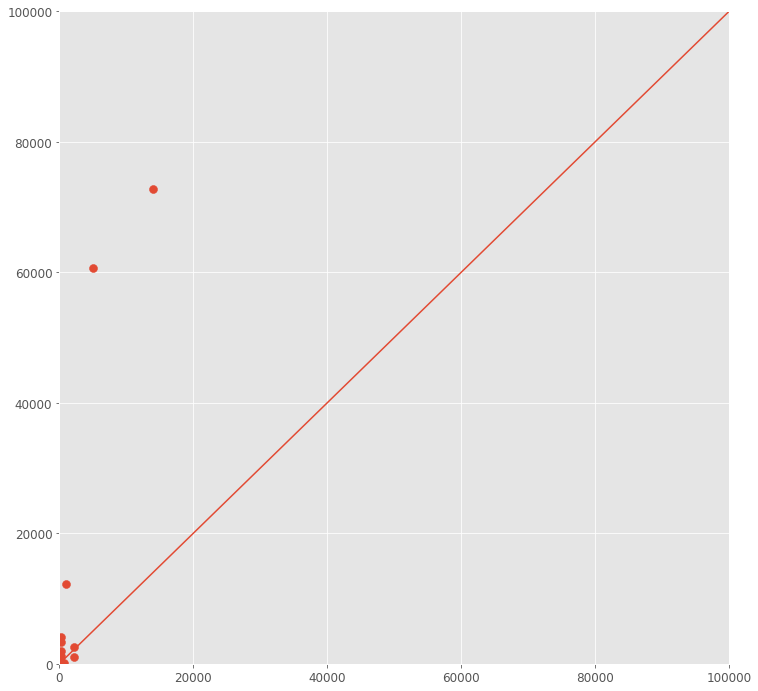

In [67]:

x_data = pow_mc_loss
y_data = FD_mc_loss

plt.scatter(x_data, y_data)

plt.plot(jnp.linspace(0, max(max(x_data), max(y_data)), 100), jnp.linspace(0, max(max(x_data), max(y_data)), 100))

# plt.xlim(0, 0.001 + max(max(x_data), max(y_data)))
# plt.ylim(0, 0.001 + max(max(x_data), max(y_data)))

plt.xlim(0, 100000)
plt.ylim(0, 100000)
# plt.xscale("log")
# plt.yscale("log")

plt.show()